In [2]:
import numpy as np
import math 
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.ticker import FormatStrFormatter
import matplotlib as mpl
import os
import pandas as pd


In [3]:
path = '/home/rosa/Escritorio/IRAF+SCRIPT/12-13 DAT/data/'
os.chdir(path)

In [4]:
rq_sshort = pd.read_csv("rq_s.dat",header=None,delimiter=r"\s+",names = ["λ","flux"])
ru_sshort = pd.read_csv("ru_s.dat",header=None,delimiter=r"\s+",names = ["λ","flux"])
rq_sa = pd.read_csv("rq_a.dat",header=None,delimiter=r"\s+",names = ["λ","flux"])
ru_sa = pd.read_csv("ru_a.dat",header=None,delimiter=r"\s+",names = ["λ","flux"])
rq_sb = pd.read_csv("rq_b.dat",header=None,delimiter=r"\s+",names = ["λ","flux"])
ru_sb = pd.read_csv("ru_b.dat",header=None,delimiter=r"\s+",names = ["λ","flux"])

In [8]:
rq_short = np.sqrt(rq_sshort)
ru_short = np.sqrt(ru_sshort)

ru_a = np.sqrt(ru_sa)
rq_a = np.sqrt(rq_sa)

ru_b = np.sqrt(ru_sb)
rq_b = np.sqrt(rq_sb)


q_s = (rq_short.flux-1)/(rq_short.flux+1)
u_s = (ru_short.flux-1)/(ru_short.flux+1)
P_s = np.sqrt(q_s**2+u_s**2)

q_a = (rq_a.flux-1)/(rq_a.flux+1)
u_a = (ru_a.flux-1)/(ru_a.flux+1)
P_a = np.sqrt(q_a**2+u_a**2)

q_b = (rq_b.flux-1)/(rq_b.flux+1)
u_b = (ru_b.flux-1)/(ru_b.flux+1)
P_b = np.sqrt(q_b**2+u_b**2)

θ_a = 0.5*np.degrees(np.arctan(u_a/q_a))
θ_b = 0.5*np.degrees(np.arctan(u_b/q_b))
θ_s = 0.5*np.degrees(np.arctan(u_s/q_s))


/usr/lib/python3/dist-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/usr/lib/python3/dist-packages/matplotlib/axes/_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


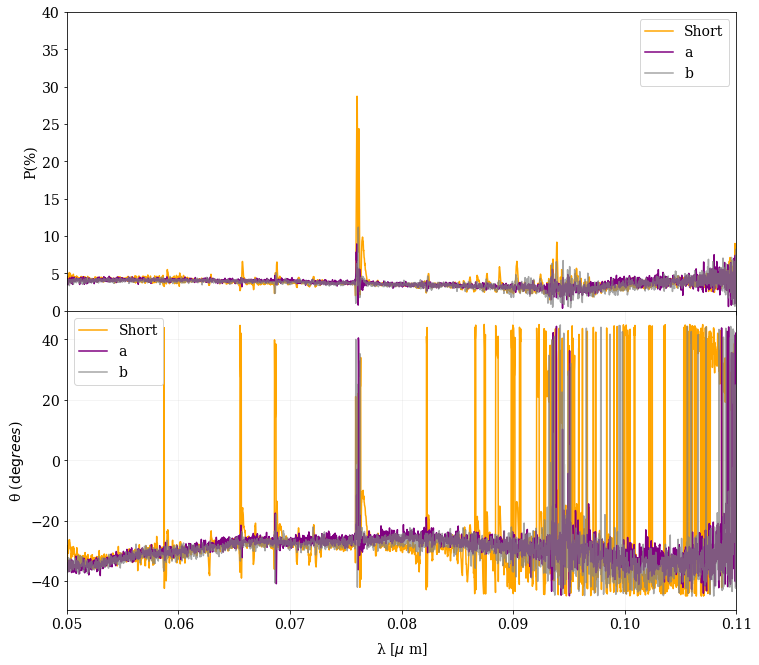

In [14]:
import mpld3
%matplotlib inline
plt.rcParams.update({'font.size': 14})
plt.rc('font', family='serif')
plt.rcParams["axes.spines.right"] = True
plt.rcParams["axes.spines.top"] = True

fig, ax = plt.subplots(2,figsize=(12, 11),sharex = True,  sharey='row')

color = np.random.random(3)
ax[0].plot(rq_sshort.λ/10e4,P_s*100, color = "orange", label = 'Short')
ax[0].plot(rq_sa.λ/10e4,P_a*100, color = "purple", label = 'a')
ax[0].plot(rq_sb.λ/10e4,P_b*100, color = "grey", alpha = 0.7,label = 'b')


ax[0].set_xlim(0.05,0.11)
ax[0].set_ylim(0,40)
ax[0].set_ylabel('P(%)')
ax[0].legend(loc = 'best')



color = np.random.random(3)
ax[1].plot(rq_sshort.λ/10e4,θ_s,color = "orange", label = 'Short')
ax[1].plot(rq_sa.λ/10e4,θ_a,color = "purple", label = 'a')
ax[1].plot(rq_sb.λ/10e4,θ_b,color = "grey",alpha = 0.7, label = 'b')

ax[1].set_xlim(0.05,0.11)
#ax[1].set_ylim(0,45)
ax[1].set_xlabel('λ [$\mu$ m]')
ax[1].set_ylabel('θ ($\degrees$)')
ax[1].xaxis.labelpad = 9

ax[1].grid(color='lightgray', alpha=0.3)
ax[1].legend(loc = 'best')

plt.subplots_adjust(wspace=0., hspace=0.0)

plt.savefig('Pandtheta.pdf')
plt.show()

#mpld3.display(fig)


In [17]:

data = pd.DataFrame()
data['λ'] = rq_sa.λ/10e4
data['u_s'] = u_s*100
data['u_a'] = u_a*100
data['u_b'] = u_b*100
data['u_mean'] = data[['u_s', 'u_a','u_b']].mean(axis=1)  
data['std_u'] = data[['u_s', 'u_a','u_b']].std(axis=1)

data['q_s'] = q_s*100
data['q_a'] = q_a*100
data['q_b'] = q_b*100
data['q_mean'] = data[['q_s', 'q_a','q_b']].mean(axis=1)  
data['std_q'] = data[['q_s', 'q_a','q_b']].std(axis=1)

data['Ps'] = P_s*100
data['Pa'] = P_a*100
data['Pb'] = P_b*100
data['p_mean'] = data[['Ps', 'Pa','Pb']].mean(axis=1)  
data['std_p'] = np.sqrt((data['q_mean']*data['std_q'])**2+(data['u_mean']*data['std_u'])**2)/data['p_mean']

data['θs'] = θ_s
data['θa'] = θ_a
data['θb'] = θ_b
data['θ_mean'] = data[['θs', 'θa','θb']].mean(axis=1)
data['std_θ'] = 28.65*np.sqrt((data['q_mean']*data['std_u'])**2+
                              (data['u_mean']*data['std_q'])**2)/data['p_mean']**2


data = data[(data['λ']>0.049) & (data['λ']<0.11)]
data.to_csv('datos.csv', header=True, index=False,decimal=",")

In [18]:
data

,λ,u_s,u_a,u_b,u_mean,std_u,q_s,q_a,q_b,q_mean,...,Ps,Pa,Pb,p_mean,std_p,θs,θa,θb,θ_mean,std_θ
443,0.049006,-3.813719,-2.975358,-3.736939,-3.508672,0.463456,6.263094,0.632034,0.832634,2.575921,...,7.332857,3.041746,3.828576,4.734393,1.771836,-15.669020,-39.003662,-38.719501,-31.130728,14.408747
444,0.049024,-4.820608,-3.795108,-3.624703,-4.080140,0.646900,6.525271,0.840830,1.171344,2.845815,...,8.112794,3.887138,3.809268,5.269733,1.794439,-18.227750,-38.753781,-36.045727,-31.009086,13.564980
445,0.049042,-4.586376,-4.337683,-2.936476,-3.953512,0.889513,6.476901,0.422974,1.644241,2.848039,...,7.936315,4.358257,3.365475,5.220015,1.872133,-17.651398,-42.215305,-30.376965,-30.081223,13.571941
446,0.049060,-3.976477,-3.657959,-3.179142,-3.604526,0.401344,6.067467,0.781030,1.915133,2.921210,...,7.254414,3.740411,3.711426,4.902084,1.684544,-16.619951,-38.973726,-29.467504,-28.353727,12.041728
447,0.049078,-4.207315,-3.845296,-3.208983,-3.753865,0.505407,6.454150,1.523285,1.957133,3.311523,...,7.704385,4.136024,3.758716,5.199708,1.776661,-16.549714,-34.194690,-29.310658,-26.685021,11.004209
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3806,0.109914,-2.563446,-7.327142,-0.649929,-3.513506,3.438496,-0.904428,1.252286,-0.549144,-0.067095,...,2.718317,7.433387,0.850863,3.667522,3.294166,35.283141,-40.150627,24.902269,6.678261,8.667746
3807,0.109932,-3.514182,-2.057810,-2.717903,-2.763298,0.729246,-4.355957,2.833574,0.254326,-0.422686,...,5.596770,3.501960,2.729776,3.942836,0.643172,19.447479,-17.994027,-42.327071,-13.624540,18.557107
3808,0.109950,-2.105124,-0.961831,-4.180372,-2.415776,1.631604,-4.885063,2.095788,-3.895873,-2.228383,...,5.319341,2.305959,5.714310,4.446537,2.090292,11.656348,-12.326035,23.508751,7.613021,14.233814
3809,0.109968,-1.502566,-6.067840,-1.745646,-3.105351,2.568468,-3.381169,-1.800652,2.347867,-0.944651,...,3.700001,6.329378,2.925707,4.318362,1.957126,11.980005,36.735785,-18.315454,10.133445,14.600326


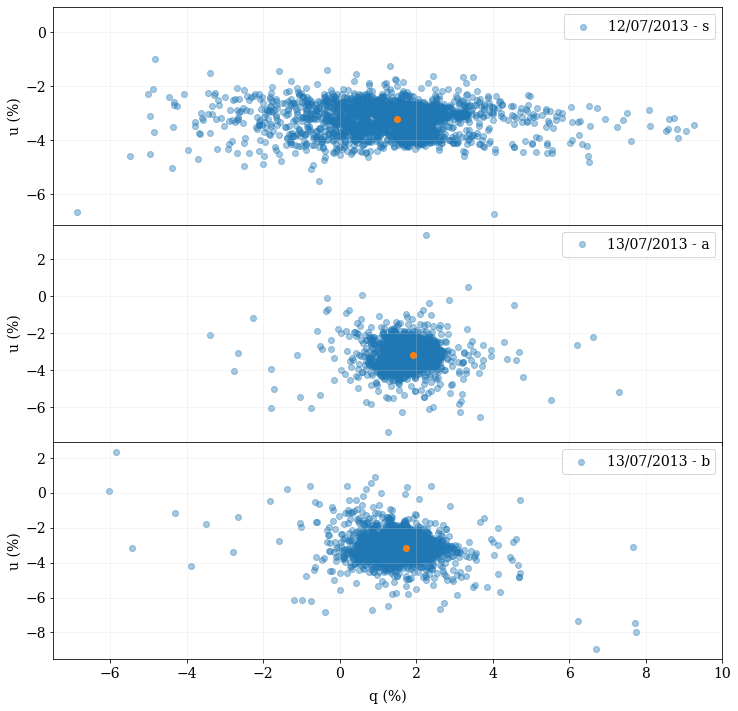

In [24]:
%matplotlib inline
plt.rcParams.update({'font.size': 14})
plt.rc('font', family='serif')
plt.rcParams["axes.spines.right"] = True
plt.rcParams["axes.spines.top"] = True

fig, ax = plt.subplots(3,figsize=(12, 12),sharex = True,  sharey='row')

color = np.random.random(3)


color = np.random.random(3)
ax[0].scatter(data['q_s'], data['u_s'], alpha =.4,label = "12/07/2013 - s")
ax[0].scatter(np.mean(data['q_s']),np.mean(data['u_s']))

ax[0].set_xlim(-7.5,10)
#ax[1].set_ylim(0,45)
ax[0].set_xlabel('q (%)')
ax[0].set_ylabel('u (%)')
ax[0].xaxis.labelpad = 9

ax[0].grid(color='lightgray', alpha=0.3)
ax[0].legend(loc = 'best')


ax[1].scatter(data['q_a'], data['u_a'],alpha =0.4, label = "13/07/2013 - a")
ax[1].scatter(np.mean(data['q_a']),np.mean(data['u_a']))


#ax[0].set_xlim(0.05,0.11)
ax[1].set_xlim(-7.5,10)
#ax[0].set_ylim(0,40)
ax[1].set_xlabel('q (%)')
ax[1].set_ylabel('u (%)')
ax[1].legend(loc = 'best')
ax[1].xaxis.labelpad = 9
ax[1].grid(color='lightgray', alpha=0.3)




color = np.random.random(3)
ax[2].scatter(data['q_b'], data['u_b'], alpha =.4, label = "13/07/2013 - b")
ax[2].scatter(np.mean(data['q_b']),np.mean(data['u_b']))

ax[2].set_xlim(-7.5,10)
#ax[1].set_ylim(0,45)
ax[2].set_xlabel('q (%)')
ax[2].set_ylabel('u (%)')
ax[2].xaxis.labelpad = 9

ax[2].grid(color='lightgray', alpha=0.3)
ax[2].legend(loc = 'best')

plt.subplots_adjust(wspace=0., hspace=0.0)

plt.savefig('uq.pdf')
plt.show()

#mpld3.display(fig)





In [ ]:
fig = plt.figure(figsize = (12,10))
θ = 0.5*np.degrees(np.arctan(data['u_s'][(data['λ']>0.049) & (data['λ']<0.11)]/data['q_s'][(data['λ']>0.049) & (data['λ']<0.11)]))
θ_a = 0.5*np.degrees(np.arctan(data['u_a'][(data['λ']>0.049) & (data['λ']<0.11)]/data['q_a'][(data['λ']>0.049) & (data['λ']<0.11)]))

λ = data['λ'][(data['λ']>0.049) & (data['λ']<0.11)]

plt.plot(lam,180+θa, alpha = 0.6)
plt.plot(lam,180+θb, alpha = 0.5)
plt.plot(lam,180+θs, alpha = 0.4)

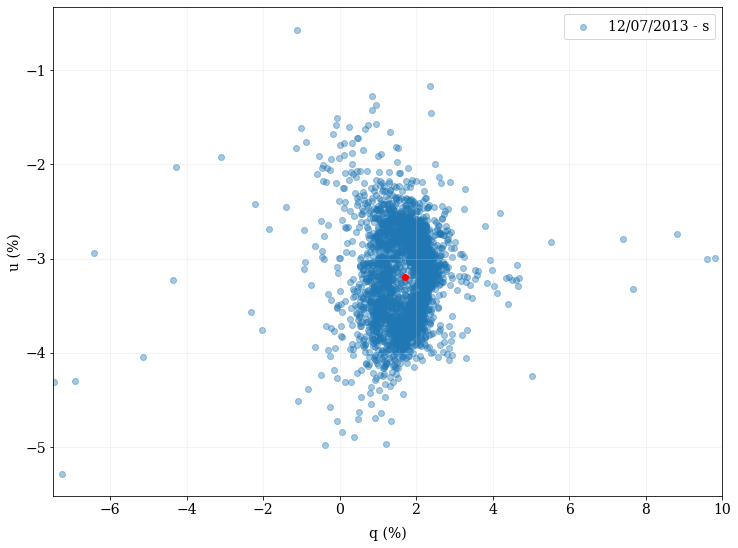

In [25]:
%matplotlib inline
plt.rcParams.update({'font.size': 14})
plt.rc('font', family='serif')
plt.rcParams["axes.spines.right"] = True
plt.rcParams["axes.spines.top"] = True

fig, ax = plt.subplots(1,figsize=(12, 9),sharex = True,  sharey='row')

color = np.random.random(3)


color = np.random.random(3)
ax.scatter(data['q_mean'], data['u_mean'],alpha =.4,label = "12/07/2013 - s")
ax.scatter(np.mean(data['q_mean']),np.mean(data['u_mean']),color = 'red', alpha = 1)

ax.set_xlim(-7.5,10)
#ax[1].set_ylim(0,45)
ax.set_xlabel('q (%)')
ax.set_ylabel('u (%)')
ax.xaxis.labelpad = 9

ax.grid(color='lightgray', alpha=0.3)
ax.legend(loc = 'best')


plt.subplots_adjust(wspace=0., hspace=0.0)

plt.savefig('uq_mean.png')
plt.show()
